# Кацуба Кирилл БПМ213
# Энергия ферромагнетика 2D (2023)

### Условие задачи

**Дано:**
- двумерная решетка молекул, расположенных в узлах кристаллической решетки, размеров $L_x \times L_y$ с периодическими границами
- каждая молекула обладает спином +1 или -1
- межмолекулярное взаимодействие описывается константами $J_{ij} = 1$
- модель Изинга


**Требуется:**
- согласно модели Изинга рассчитать нормированное значение средней энергии $\frac{\langle E \rangle}{Lx Ly}$ для указанной решетки молекул при:
    - размерах решетки $L_x \in [2, 3, ..., 8]$, $L_y = 4$
    - температурах $kT \in [1.0, 5.0)$ с шагом $0.1$
- сохранить массив средних энергий при помощи `np.save`
- вывести время расчета каждой итерации по $Lx$ или по $k T$
- отобразить цветовую карту:
    - ось абсцисс - $L_x$,
    - ось ординат - $k T$,
    - цветом отобразить нормированное значение средней энергии $\frac{\langle E \rangle}{Lx Ly}$,
    - подписать оси,
    - отобразить цветовую шкалу (`colorbar`),
    - засечки должны соответствовать значениям $Lx, kT$.
- к каждой функции добавить `docstring` с описанием того, что функция делает, всех параметров и возвращаемого значения    

**Описание:**

**Одномерный случай**

Модель Изинга является моделью магнетика. Пусть этот магнетик состоит из молекул, расположенных в узлах регулярной решетки. Пусть всего таких узлов будет $N$ штук, с индексами $i=1,\ldots, N$.

Предположим, что каждая молекула может быть представлена в виде магнитной стрелки, которая всегда либо направлена вдоль некоторой заданной оси, либо в противоположном направлении. То есть каждая молекула $i$ имеет две конфигурации, которые можно описывать с помощью "спиновой" переменной $\sigma_i$. Эта переменная принимает значение $+1$ (параллельно оси, спин направлен вверх) и $-1$ (антипараллельно оси, спин направлен вниз).

Пусть $\sigma = \{\sigma_1, \sigma_2, \ldots, \sigma_N\}$ обозначает набор значений всех $N$ спинов. Имеется $2^N$ различных наборов $\sigma$, и каждый из них описывает некоторое состояние системы. 

Гамильтониан системы  состоит из двух частей: первая $E_0$ включает вклад межмолекулярных сил внутри магнетика, а вторая $E_1(\sigma)$ вклад от взаимодействий каждого спина с внешним магнитным полем (здесь считается нулевым). 
$$H(\sigma)=E_0(\sigma)+E_1(\sigma)$$

В любой физической системе мы предполагаем все взаимодействия инвариантными по отношению к обращению времени, что означает инвариантность $E$ при изменении знаков всех полей и намагниченностей. Энергия должна быть четной функцией от $\sigma$:
$$E_0(\sigma_1,\ldots, \sigma_N)=E_0(-\sigma_1,\ldots, -\sigma_N)$$

Энергия системы при нулевом внешнем магнитном поле равна сумме произведений **соседних** спинов на константы взаимодействия $J_{ij}$
$$E(\sigma) = -\sum_{i} J_{i,i+1}\sigma_{i}\sigma_{i+1} $$

Вероятность находиться в состоянии $\sigma$
$$P(\sigma)=\frac{e^{-\beta E(\sigma)}}{Z},$$
	где $Z = \sum_{\sigma} e^{-\beta E(\sigma)}-$ статистическая сумма, $\beta = \frac{1}{k T}-$ обратная температура, $k-$ константа Больцмана.
	
Средняя энергия системы 
$$\langle E \rangle = \frac{1}{Z}\sum_{\{\sigma \}} E(\sigma)e^{-\frac{E(\sigma)}{kT}}$$
рассчитывается по всевозможным состояниям системы, т.е. всевозможным наборам $\sigma$.

**Двумерный случай**

В случае двумерной решетки энергия системы при нулевом внешнем магнитном поле вычисляется следующим образом: 
$$E(\sigma) = -\sum_{i,j} J_{ij}(\sigma_{i,j}\sigma_{i+1,j} + \sigma_{i,j}\sigma_{i,j+1})$$


**Проверка корректности результатов**

Нормированное значение средней энергии при температурах $kT \in [1.0, 5.0)$:

- для $L_x=4$

```
 -1.99715844 -1.99396091 -1.98856632 -1.98016965 -1.96786355 -1.95064256
 -1.9274244  -1.89711215 -1.85871667 -1.81153907 -1.75538029 -1.69071311
 -1.61874282 -1.54131149 -1.46065977 -1.37911648 -1.29880759 -1.22145424
 -1.14828469 -1.0800446  -1.01706963 -0.95938399 -0.90679838 -0.85899291
 -0.8155803  -0.77615005 -0.74029707 -0.70763857 -0.67782287 -0.65053286
 -0.62548613 -0.60243323 -0.58115501 -0.56145948 -0.5431787  -0.52616582
 -0.5102923  -0.49544555 -0.48152673 -0.46844889
```

- для $L_x=5$

```
 -1.99715893 -1.99396296 -1.98857263 -1.98018387 -1.96788363 -1.95063964
 -1.92729692 -1.89661121 -1.85735639 -1.80853133 -1.74965024 -1.68103752
 -1.60399878 -1.52075577 -1.43412763 -1.3470633  -1.26219309 -1.18153361
 -1.10638872 -1.03740747 -0.97472647 -0.918132   -0.86720255 -0.82141645
 -0.78022445 -0.74309384 -0.70953215 -0.67909749 -0.65140075 -0.62610332
 -0.60291264 -0.58157686 -0.56187952 -0.54363452 -0.52668165 -0.51088271
 -0.49611811 -0.48228409 -0.46929029 -0.45705774
```

**Материалы:**
- [Бэкстер Р., Вольский Е. П., Дайхин Л. И. Точно решаемые модели в статистической механике](https://yadi.sk/i/2oY4c0bL08pNiw)
- [Пример хорошего `docstring`](https://github.com/numpy/numpy/blob/v1.21.0/numpy/linalg/linalg.py#L313-L395)
- [Зиннуров Б.Д., Якименко В.Я. Магнитные свойства модели Изинга в низких размерностях (МКР)](https://miem.hse.ru/data/2018/05/24/1149431665/model_Izinga_-_Zinnurov_Yakimenko.pdf)


**Правила оценивания:**

- оценка за корректно выполненный расчет для количества молекул в цепочке $L_x$, баллов из 100:
```
    Lx    =   2,   3,   4,   5,    6,    7,     8
    g(Lx) = 1.0, 1.8, 3.3, 6.4, 12.6, 24.9,  50.0
```
    
- штрафы $p(i)$, баллов:
    - не выведено время расчета - 20
    - не выведены значения средней энергии - 20
    - не построена карта - 20
    - отсутствует `docstring` - 20
    - менее значимые недоработки - 10


- итоговая оценка за задание = $\sum_{Lx=2}^{8}{g(Lx)} - \sum_{i}{p(i)}$


In [1]:
from itertools import product
import time
from math import exp
import numpy as np
from numba import njit, prange
from tqdm import trange
import matplotlib.pyplot as plt

# Основная задача

In [2]:
@njit
def energy(sigma: np.ndarray, Lx: int, Ly: int) -> int:
    """
    Функция для подсчета энергии одной конфигурации спинов
    для двумерной периодической решетки, по следующей формуле:
    energy = - summ(Jij * (sigma[i,j] * sigma[i + 1, j] + sigma[i,j] * sigma[i, j + 1])) 
    Jij = 1 для всех i, j. Jij - межмолекулярное взаимодействие описывается константами, 
    sigma[i, j] - спин моллекулы (i, j).
    
    Параментры
    ----------
    sigma - двумерный массив спинов моллекул
    Lx - длина решетки по оси абсцисс
    Ly - длина решетки по оси ординат
    
    Возвращаемое значение
    ---------------------
    Энергия посчитанная для конфигурации спинов sigma размера Lx * Ly.
    """
    E = 0
    
    for i in range(Lx):
        for j in range(Ly):
            E -= sigma[i,j] * sigma[(i + 1) % Lx, j] + sigma[i,j] * sigma[i, (j + 1) % Ly]
    return E

In [3]:
@njit
def int2array(x: int, Lx: int, Ly: int) -> np.ndarray:
    """
    Функция для генирации конфигурации спинов с помощью преобразования некоторого 
    целого числа x в массив состоящий из чисел -1 и 1. Данное преобразование 
    проводится с помощью бинарной операции "побитовое и" &. Функция действует так, что для
    фиксированного Lx и Ly генерация конфигурации спинов для любого x от 1 до 2^{Lx * Ly - 1}
    полученная конфигурация будет уникальной. 
    
    Таким образом, далее в решении задачи, используя данную функцию в цикле,
    мы переберем все возможные конфигурации спинов для заданных размеров, учитываю что
    функция энергия четная (то есть перебор можно уменьшить в 2 раза).
    
    Параментры
    ----------
    x - целое число, которое преобразовывается в массив
    Lx - длина решетки по оси абсцисс
    Ly - длина решетки по оси ординат
    
    Возвращаемое значение
    ---------------------
    Массив размера Lx * Ly конфигурации спинов.
    """
    n = Lx * Ly
    res = np.empty((Lx, Ly), dtype=np.int8)
    for i in range(Lx):
        for j in range(Ly):
            res[i][j] = (x & 1) * 2 - 1
            x = x >> 1
    return res

In [4]:
@njit(parallel=True)
def mean_energy(kT: float, Lx: int, Ly: int) -> float:
    """
    Функция для подсчета средней энергии системы
    для двумерной периодической решетки, по следующей формуле:
    mean_energy = (- 1 / Z) * summ(energy(sigma) * exp(- energy(sigma) / kT)) - сумма по всем 
    конфигурациям sigma. Z = summ(exp(- energy(sigma) / kT)) - сумма по всем конфигурациям sigma, 
    energy(sigma) - энергия одной конфигурации спинов sigma.

    Параментры
    ----------
    kT - температура системы
    Lx - длина решетки по оси абсцисс
    Ly - длина решетки по оси ординат
    
    Возвращаемое значение
    ---------------------
    Нормированная средняя энергия всей заданной системы моллекул размера Lx * Ly.
    """
    E_mean = 0
    Z = 0
    n = Lx * Ly
    for sigma in prange(2**(n-1)):
        E = energy(int2array(sigma, Lx, Ly), Lx, Ly)
        e = exp(-E / kT)
        E_mean += E * e
        Z += e
    E_mean /= Z
    return E_mean / n

In [6]:
ans = np.empty((7, 40), dtype=float)
for x in range(2, 9):
    for kt in trange(10, 50):
        ans[x - 2, kt - 10] = mean_energy(kt/10, x, 4)

100%|███████████████████████████████████████████| 40/40 [43:22<00:00, 65.07s/it]


Сохранеям полученный результат

In [136]:
np.save('/Users/kirill/edu/3course/CP3/HW_3/Ising_model.npy', ans)

In [6]:
for x in range(2, 9):
    start = time.time()
    mean_energy(3.4, x, 4)
    print(f"Время расчета средней энергии для kT = 3.4, Lx = {x}: {time.time() - start} секунд")

Время расчета средней энергии для kT = 3.4, Lx = 2: 0.0001480579376220703 секунд
Время расчета средней энергии для kT = 3.4, Lx = 3: 0.0003170967102050781 секунд
Время расчета средней энергии для kT = 3.4, Lx = 4: 0.002496004104614258 секунд
Время расчета средней энергии для kT = 3.4, Lx = 5: 0.021241188049316406 секунд
Время расчета средней энергии для kT = 3.4, Lx = 6: 0.16224193572998047 секунд
Время расчета средней энергии для kT = 3.4, Lx = 7: 3.6884169578552246 секунд
Время расчета средней энергии для kT = 3.4, Lx = 8: 62.17241811752319 секунд


Убедимся в правильности расчетов, сравним результаты с преведенными в условии для Lx = 4, Lx = 5.

In [6]:
ising_model = np.load('/Users/kirill/edu/3course/CP3/HW_3/Ising_model.npy')
print(f'Lx = 4\n{ising_model[2]}\n\nLx = 5\n{ising_model[3]}\n\nРезультаты совпали')

Lx = 4
[-1.99715844 -1.99396091 -1.98856632 -1.98016965 -1.96786355 -1.95064256
 -1.9274244  -1.89711215 -1.85871667 -1.81153907 -1.75538029 -1.69071311
 -1.61874282 -1.54131149 -1.46065977 -1.37911648 -1.29880759 -1.22145424
 -1.14828469 -1.0800446  -1.01706963 -0.95938399 -0.90679838 -0.85899291
 -0.8155803  -0.77615005 -0.74029707 -0.70763857 -0.67782287 -0.65053286
 -0.62548613 -0.60243323 -0.58115501 -0.56145948 -0.5431787  -0.52616582
 -0.5102923  -0.49544555 -0.48152673 -0.46844889]

Lx = 5
[-1.99715893 -1.99396296 -1.98857263 -1.98018387 -1.96788363 -1.95063964
 -1.92729692 -1.89661121 -1.85735639 -1.80853133 -1.74965024 -1.68103752
 -1.60399878 -1.52075577 -1.43412763 -1.3470633  -1.26219309 -1.18153361
 -1.10638872 -1.03740747 -0.97472647 -0.918132   -0.86720255 -0.82141645
 -0.78022445 -0.74309384 -0.70953215 -0.67909749 -0.65140075 -0.62610332
 -0.60291264 -0.58157686 -0.56187952 -0.54363452 -0.52668165 -0.51088271
 -0.49611811 -0.48228409 -0.46929029 -0.45705774]

Результа

## Построение карты, отображающей средние энергии системы в завсисимости от размера Lx и температуры kT

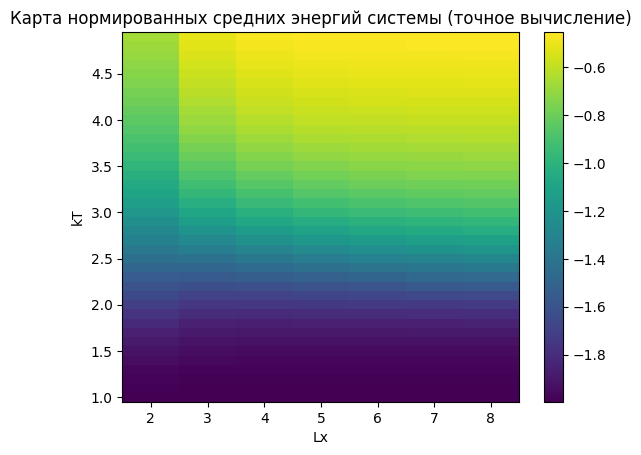

In [8]:
plt.pcolormesh(np.arange(2,9), np.linspace(1, 4.9, 40), ising_model.transpose())
plt.colorbar()
plt.title("Карта нормированных средних энергий системы (точное вычисление)")
plt.xlabel("Lx")
plt.ylabel("kT")
None

## Алгоритм Метрополис

Как мы видим вычисления средней энергии для Lx > 5 тратится достаточно большое время (относительно других размерностей). 

Поэтому будем применять алгоритм Метрополиса для того, чтобы ускорить вычисления для Lx > 5, кратко опишем что необходимо сделать:
1. Сначала генерируем случайную (равномерное распределние) начальную конфигурацию спинов для решетки Lx * Ly, считаем энергию $E_{0}$ для данной конфигурации.
2. Затем выбираем случайный спин из имеющихся N спинов и меняем его значение $\sigma_{k}$ на противоположное $-\sigma_{k}$. Считаем энергию $E_{1}$ новой конфигурации.
3. Считаем разность двух энергий $\Delta E = E_{1} - E_{0}$. Далее считаем вероятность перехода системы из одного состояние в другое $P = e^{-\beta \Delta E}$:
    1. Если $\Delta E\leq0$, то преобразование спина $\sigma_{k}$ принимается. Тогда считается новая средняя энергия и алгоритм продолжается (повторяем шаги 2-3).
    2. Если $\Delta E>0$, то генерится случайное число $r$, и если $r \leq P$ преобразование спина $\sigma_{k}$ принимается, иначе оставляем спин неповернутым, считаем среднюю энергию и алгоритм продолжается (повторяем шаги 2-3).
    
Но стоит отметить, что все алгоритмы описанные ниже используют Монте-Карло и Метрополис для больших систем 100 * 100, 1000 * 1000. Так же в изученных статьях указано, что для маленких систем (как раз такие и описываются в поставленной задаче) выше описанный алгоритм будет давать погрешность в измерениях.

Источники: 
1. [Ising model github repository](https://rajeshrinet.github.io/blog/2014/ising-model/)
2. [The Ising model The Metropolis algorithm, University of British Columbia](https://phas.ubc.ca/~rozali/8.pdf)
3. [Monte Carlo, Metropolis and the Ising Model](https://sites.physics.wustl.edu/gradcomputer/wiki/images/6/63/Ising_notes_v2.pdf)
4. [Numerical Solutions to the Ising Model using the Metropolis Algorithm](https://www.maths.tcd.ie/~dbennett/js/ising.pdf)

In [9]:
def metropolis_algorithm(Lx: int, Ly: int, kT: float) -> float:
    """
    Применяется метод Монте-Карло, используя алгоритм Метрополис,
    для модели Изинга, по алгоритму (более подробно представлен выше):
    
    1. Генерируем случайную конфигурацию спинов, с энегрией E0
    2. Выбираем случайный спин, меняем его значение Sk на -Sk, E1 - энергия новой конфигурации
    3. Разность двух энергий dE = E1 - E0, вероятность P = exp(-beta * dE):
    4. dE <= 0, то преобразование спина Sk принимается.
    5. dE >= 0, генирим случайное r:
        r <= P - конфигурация принимается
        иначе конфигурация не принимается
    6. Считаем среднюю энергию
    7. Повторяем 2-6
    
    Параментры
    ----------
    Lx -длина решетки по оси абсцисс
    Ly - длина решетки по оси ординат
    kT - температура
    
    Возвращаемое значение
    ---------------------
    Нормированная средняя энергия посчитанная для заданного Lx, Ly и kT.
    """
    n = Lx * Ly
    sigma =  np.random.random((Lx,Ly))
    for i in range(Lx):
        for j in range(Ly):
            if sigma[i,j] <= 0.5:
                sigma[i,j] = 1
            else:
                sigma[i,j] = -1
    E = energy(sigma, Lx, Ly)
    mean_energy = np.exp((-1 / kT) * E) * E
    Z = np.exp((-1 / kT) * E)
    for i in range(250):
        x_cord = np.random.randint(Lx)
        y_cord = np.random.randint(Ly)

        dE = 2 * sigma[x_cord,y_cord] * (sigma[x_cord, (y_cord + 1) % Ly] + \
                                         sigma[(x_cord + 1) % Lx, y_cord] +
                                         sigma[x_cord, (y_cord - 1) % Ly] +
                                         sigma[(x_cord - 1) % Lx, y_cord])
        if dE <= 0:
            sigma[x_cord, y_cord] *= -1
            E = energy(sigma, Lx, Ly)
            Z += np.exp((-1 / kT) * E)
            mean_energy += np.exp((-1 / kT) * E) * E
        else:
            r = np.random.random()
            if r <= np.exp((-1 / kT) * dE):
                sigma[x_cord, y_cord] *= -1
                E = energy(sigma, Lx, Ly)
                Z += np.exp((-1 / kT) * E)
                mean_energy += np.exp((-1 / kT) * E) * E
    return mean_energy / (Z*n)

Так как постоянно генерятся случайные конфигурации сигма, то для каждого набора x и kT будем в качестве средней энергии брать срреднее по 300 вычислениям алгоритма Метрополиса

In [10]:

ans = np.empty((7, 40), dtype=float)
for x in range(2, 9):
    for kt in trange(10, 50):
        tmp = 0
        for n in range(300):
            tmp += metropolis_algorithm(x, 4, kt/10)
        ans[x - 2, kt - 10] = tmp / 300
np.save('/Users/kirill/edu/3course/CP3/HW_3/Ising_model_metropolis.npy', ans)

100%|███████████████████████████████████████████| 40/40 [00:18<00:00,  2.22it/s]


In [13]:
ising_model_metropolis = np.load('/Users/kirill/edu/3course/CP3/HW_3/Ising_model_metropolis.npy')

In [14]:
for x in range(2, 9):
    start = time.time()
    metropolis_algorithm(x, 4, 3.4)
    print(f"Время расчета средней энергии (Алгоритм Метрополис, 1 круг) для kT = 3.4, Lx = {x}: {time.time() - start} секунд")

Время расчета средней энергии (Алгоритм Метрополис, 1 круг) для kT = 3.4, Lx = 2: 0.0030393600463867188 секунд
Время расчета средней энергии (Алгоритм Метрополис, 1 круг) для kT = 3.4, Lx = 3: 0.004181861877441406 секунд
Время расчета средней энергии (Алгоритм Метрополис, 1 круг) для kT = 3.4, Lx = 4: 0.004430055618286133 секунд
Время расчета средней энергии (Алгоритм Метрополис, 1 круг) для kT = 3.4, Lx = 5: 0.003634929656982422 секунд
Время расчета средней энергии (Алгоритм Метрополис, 1 круг) для kT = 3.4, Lx = 6: 0.0036928653717041016 секунд
Время расчета средней энергии (Алгоритм Метрополис, 1 круг) для kT = 3.4, Lx = 7: 0.0026121139526367188 секунд
Время расчета средней энергии (Алгоритм Метрополис, 1 круг) для kT = 3.4, Lx = 8: 0.0022852420806884766 секунд


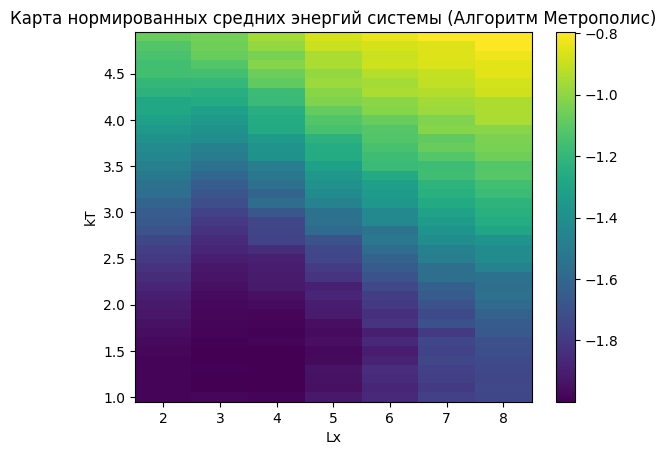

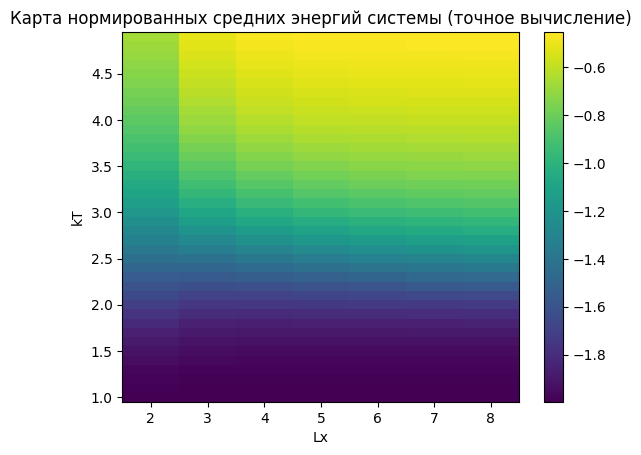

In [15]:
plt.figure()
plt.pcolormesh(np.arange(2,9), np.linspace(1, 4.9, 40), ising_model_metropolis.transpose())
plt.colorbar()
plt.title("Карта нормированных средних энергий системы (Алгоритм Метрополис)")
plt.xlabel("Lx")
plt.ylabel("kT")
None

plt.figure()
plt.pcolormesh(np.arange(2,9), np.linspace(1, 4.9, 40), ising_model.transpose())
plt.colorbar()
plt.title("Карта нормированных средних энергий системы (точное вычисление)")
plt.xlabel("Lx")
plt.ylabel("kT")
None